In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/62/1e/a94a8d635fa3ce4cfc7f506003548d0a2447ae76fd5ca53932970fe3053f/pyasn1-0.4.8-py2.py3-none-any.whl
  Stored in directory: C:\Users\EDA9~1\AppData\Local\pip\Cache\wheels\32\ba\ac\dbd210e9db9e5d549b3d98c57713684c5768298f259b1925ef
  Stored in directory: C:\Users\EDA9~1\AppData\Local\pip\Cache\wheels\15\01\cd\eabe82f170ece45154884012dbd2cfb799935e436ad319a547
  Stored in directory: C:\Users\EDA9~1\AppData\Local\pip\Cache\wheels\28\7b\bb\5af0216178450142d64876ad635c9e64cb8ac48a584c419214
Successfully built tensor flow construct
Note: you may need to restart the kernel to use updated packages.


automat 20.2.0 has requirement attrs>=19.2.0, but you'll have attrs 19.1.0 which is incompatible.


In [6]:
import os,sys,glob,time
import numpy as np
from PIL import Image, ImageDraw
from skimage.io import imshow, imread
import tensorflow as tf
path = os.getcwd()
print(path)

C:\Users\ПОЛЬЗОВАТЕЛЬ


In [7]:
Net =[]
t = time.time()
Net.append(tf.keras.models.load_model(path + "/net/Зд.ул.h5")) ## Неправильная сеть
Net.append(tf.keras.models.load_model(path + "/net/Зд.ул.h5"))
Net.append(tf.keras.models.load_model(path + "/net/Д.н.h5"))
Net.append(tf.keras.models.load_model(path + "/net/Л.н.h5"))
Net.append(tf.keras.models.load_model(path + "/net/Од.мн.h5"))
print("%s сек. Понадобилось для загрузки сетей" % round(time.time()-t,2))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
11.11 сек. Понадобилось для загрузки сетей


In [8]:
# Сосздания белого холста
def im_in_white(im):
    draw = ImageDraw.Draw(im)
    width = im.size[0]
    height = im.size[1]
    pix = im.load()
    for i in range(width):
        for j in range(height):
            draw.point((i,j),(255,255,255))
    return(im)

# Подгон изображения в рамки размера
def podgon(path,size):
    imge = Image.open(path)
    imshow(imread(path))
    shape = imge.size
    if shape[0]>=shape[1]: 
        k = size[0]/shape[0]
    else:
         k = size[1]/shape[1]
    height = round(shape[0]*k)
    widht  = round(shape[1]*k)
    out_imge = imge.resize((height , widht))
    return(out_imge)

# Вставка изображения в холст
def past_im(holst,path_im,im):
    if im == None:  im = Image.open(path_im)
    draw = ImageDraw.Draw(holst)
    width = im.size[0]
    height = im.size[1]
    pix = im.load()
    for i in range(width):
        for j in range(height):
            r = pix[i,j][0] 
            g = pix[i,j][1] 
            b = pix[i,j][2]
            draw.point((i,j),(r,g,b))
    return(holst)


# Итерпритация выхода сети в вероятность
def predict_(inp):
    if inp[0]>= inp[1]:
        v = round(inp[0]*100)
        return [1,v]
    else:
        v = round(inp[1]*100)
        return[0,v];  

# Функция объединяющая предсказания сетей в удобну форму восприятия    
size = (400,400,3)    
def selecting_photos(n):
    t = time.time()
    path_ = path +"/test/1 ({}).jpg".format(n);
    predict = []
    holst = im_in_white(Image.new("RGB",size[:2]))
    imge = past_im(holst,'',im=podgon(path_,size[:2]))
    tabe = np.array(imge)/255
    tabe = tabe.reshape(1,400,400,3)
    print("————————————————————————————————————————————————————>")
    predict.append(predict_([0,100])) ## Предсказание ещё не обученной сети
    if predict[0][0] == 1: 
        print("На фотографии текст с вероятностью {}_%".format(predict[0][1]))
    else:
        predict.append(predict_(Net[1].predict(tabe)[0]))
        if predict[1][0] == 1: 
            print("Фотография сделана в здании с вероятностью {}_%".format(predict[1][1]))
        else:    
            print("Фотография сделана на улице с вероятностью {}_%".format(predict[1][1]))
        predict.append(predict_(Net[2].predict(tabe)[0]))
        if predict[2][0] == 1: 
            print("Фотография сделана днём с вероятностью {}_%".format(predict[2][1]))
        else:    
            print("Фотография сделана ночью с вероятностью {}_%".format(predict[2][1]))
        predict.append(predict_(Net[3].predict(tabe)[0]))
        if predict[3][0] == 1: 
            print("На фотографии присутствуют люди с вероятностью {}_%".format(predict[3][1]))
            predict.append(predict_(Net[4].predict(tabe)[0]))
            if predict[4][0] == 0: 
                    print("На фотографии более одного человека с вероятностью {}_%".format(predict[4][1]))
            else:    
                    print("На фотографии один человек с вероятностью {}_%".format(predict[4][1]))
        else:    
            print("На фотографии нет людей с вероятностью {}_%".format(predict[3][1]))
            predict.append(predict_([0,0]))
    t = round(time.time() - t,2)
    print("Сеть дала ответ за %s сек." % t)
    print("<————————————————————————————————————————————————————")
    holst = im_in_white(holst)
    

Номер теста ———>>> 15
————————————————————————————————————————————————————>
Фотография сделана на улице с вероятностью 98.0_%
Фотография сделана днём с вероятностью 98.0_%
На фотографии присутствуют люди с вероятностью 99.0_%
На фотографии более одного человека с вероятностью 100.0_%
Сеть дала ответ за 1.6 сек.
<————————————————————————————————————————————————————


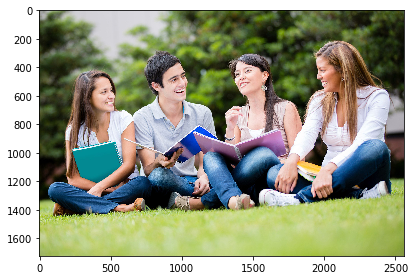

In [11]:
n = input("Номер теста ———>>> ");
selecting_photos(n);

In [41]:
## Прогон сети по N тестам
t=time.time()
N = 40
for i in range(N):
    selecting_photos(i+1);
print(time.time()-t)

————————————————————————————————————————————————————>
Фотография сделана на улице с вероятностью 100.0_%
Фотография сделана ночью с вероятностью 99.0_%
На фотографии присутствуют люди с вероятностью 59.0_%
На фотографии более одного человека с вероятностью 76.0_%
Сеть дала ответ за 2.06
<————————————————————————————————————————————————————
————————————————————————————————————————————————————>
Фотография сделана на улице с вероятностью 100.0_%
Фотография сделана днём с вероятностью 95.0_%
На фотографии присутствуют люди с вероятностью 100.0_%
На фотографии один человек с вероятностью 60.0_%
Сеть дала ответ за 2.04
<————————————————————————————————————————————————————
————————————————————————————————————————————————————>
Фотография сделана в здании с вероятностью 96.0_%
Фотография сделана днём с вероятностью 98.0_%
На фотографии нет людей с вероятностью 98.0_%
Сеть дала ответ за 1.95
<————————————————————————————————————————————————————
———————————————————————————————————————————————————

————————————————————————————————————————————————————>
Фотография сделана в здании с вероятностью 100.0_%
Фотография сделана днём с вероятностью 99.0_%
На фотографии нет людей с вероятностью 65.0_%
Сеть дала ответ за 3.16
<————————————————————————————————————————————————————
————————————————————————————————————————————————————>
Фотография сделана на улице с вероятностью 100.0_%
Фотография сделана днём с вероятностью 98.0_%
На фотографии присутствуют люди с вероятностью 60.0_%
На фотографии более одного человека с вероятностью 99.0_%
Сеть дала ответ за 4.08
<————————————————————————————————————————————————————
————————————————————————————————————————————————————>
Фотография сделана в здании с вероятностью 100.0_%
Фотография сделана днём с вероятностью 99.0_%
На фотографии присутствуют люди с вероятностью 83.0_%
На фотографии более одного человека с вероятностью 84.0_%
Сеть дала ответ за 3.48
<————————————————————————————————————————————————————
———————————————————————————————————————————